# **M2 Amazon OnePlus Review Dataset**

1. Amazon OnePlus Review Dataset 
2. Text Pre-Processing
3. Numerical Descriptive Statistics
4. Graphical Descriptive Statistics
5. Interactive Visualizations
6. Automated Visualization
7. Conclusions

Some code snippets were adapted from https://data-science-blog.com/en/blog/2018/11/04/sentiment-analysis-using-python/

You can see another example notebook dealing with Amazom reviews here: https://towardsdatascience.com/predicting-sentiment-of-amazon-product-reviews-6370f466fa73

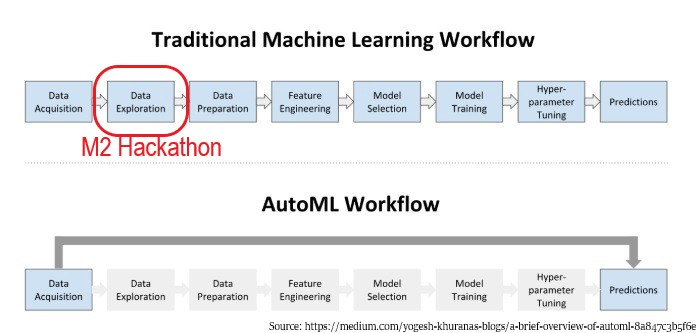

#**Table of Contents**
* Business Problem
* BLUF
* Libraries
* Data
* Missing Values
* Duplicates
* Text Preprocessing
* Descriptive Statistics
* Interactive Visualizations
* Automated Visualizations
* Conclusions

#**Business Problem**
The business problem in this notebook is to explore the Anazon product review data with a view to a) identifying data preparation needs for development of a machine learning regressor that can predict helpfulVotes leads, and b) form inferences about relationships between the features and identify strong predictors of helpfulVotes.

#**BLUF** 
(Bottom Line Up Front)

This dataset contains text, which must be processed for subjectivity and sentiment. *asin* and *name* can presumably be deleted. Deletion of reviews with a missing review title or body will not materially change the analysis. May need to consider the effect of different stemmers and sentiment analysis tools.

#**Libraries**

In [ ]:
# Basic Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


In [ ]:
# Sweetviz library
!pip install sweetviz     # You may need to pip install sweetviz
import sweetviz as sv

     |████████████████████████████████| 15.1 MB 2.9 MB/s 


In [ ]:
# Plotly & Jupyter-Dash
!pip install plotly --upgrade    # you may need to pip install plotly and jupyter-dash
!pip install jupyter-dash

import plotly.graph_objects as go
import plotly.express as px
import dash
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output 

     |████████████████████████████████| 27.7 MB 53.4 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
     |████████████████████████████████| 9.6 MB 4.2 MB/s 
     |████████████████████████████████| 357 kB 66.1 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=20b9f12391c3adf14c58a23530c8a913de2ce804c71e3c483af172ef94e309f5
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# Wordcloud
!pip install wordcloud
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS


In [ ]:
# !pip install autoviz    # Installs AutoViz
# #importing Autoviz class
# from autoviz.AutoViz_Class import AutoViz_Class#Instantiate the AutoViz class
# AV = AutoViz_Class()

#**Data**

Data source: https://www.kaggle.com/grikomsn/amazon-cell-phones-reviews?select=20191226-reviews.csv

The features in the data set are as follows:
- asin: [string] Reference
- name: [string] Name of reviewer
- rating: [int] Number of stars (out of 5)
- date: [string] Date of review
- verified: [string] Verfication status of reviewer
- title: [string] Title of review
- body: [string] Text comments
- helpfulVotes: [int] Number of votes finding review helpful

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

# Read in Amazon One PLus Reviews Dataset
file_ = "drive/My Drive/Colab Notebooks/Big Data ML/New BDML/Data/20191226-reviews.csv"   # adapt this as needed to the file structure on your Google drive
df = pd.read_csv(file_) # read in csv file

Mounted at /content/drive


In [ ]:
# Ensure maximum display for pandas
pd.set_option('display.max_columns', None)

# Features of dataset
print('COLUMNS of df\n',df.columns,'\n\n')

# Examine the data using df.head() or df.tail()
print("HEAD of df\n", df.head(),'\n\n')
#print("\nTAIL of df\n", df.tail(),'\n\n')

# Shape of DataFrame
print("\nSHAPE of df\n", df.shape) 


COLUMNS of df
 Index(['asin', 'name', 'rating', 'date', 'verified', 'title', 'body',
       'helpfulVotes'],
      dtype='object') 


HEAD of df
          asin           name  rating               date  verified  \
0  B0000SX2UC          Janet       3   October 11, 2005     False   
1  B0000SX2UC     Luke Wyatt       1    January 7, 2004     False   
2  B0000SX2UC         Brooke       5  December 30, 2003     False   
3  B0000SX2UC  amy m. teague       3     March 18, 2004     False   
4  B0000SX2UC  tristazbimmer       4    August 28, 2005     False   

                                          title  \
0                   Def not best, but not worst   
1                   Text Messaging Doesn't Work   
2                               Love This Phone   
3                       Love the Phone, BUT...!   
4  Great phone service and options, lousy case!   

                                                body  helpfulVotes  
0  I had the Samsung A600 for awhile which is abs...           

In [ ]:
# Correct date type
for i in range(len(df['date'])):
  df.at[i,'date'] = datetime.strptime(df.at[i,'date'],'%B %d, %Y')

In [ ]:
print("HEAD of df\n", df.head(),'\n\n')

HEAD of df
          asin           name  rating                 date  verified  \
0  B0000SX2UC          Janet       3  2005-10-11 00:00:00     False   
1  B0000SX2UC     Luke Wyatt       1  2004-01-07 00:00:00     False   
2  B0000SX2UC         Brooke       5  2003-12-30 00:00:00     False   
3  B0000SX2UC  amy m. teague       3  2004-03-18 00:00:00     False   
4  B0000SX2UC  tristazbimmer       4  2005-08-28 00:00:00     False   

                                          title  \
0                   Def not best, but not worst   
1                   Text Messaging Doesn't Work   
2                               Love This Phone   
3                       Love the Phone, BUT...!   
4  Great phone service and options, lousy case!   

                                                body  helpfulVotes  
0  I had the Samsung A600 for awhile which is abs...           1.0  
1  Due to a software issue between Nokia and Spri...          17.0  
2  This is a great, reliable phone. I also purc

#**Missing Values**

Missing values may distort the quality of the learning process in the case of some algorithms. Other algorithnms are less sensitive.

Possible fixs for missing valeus include:
* DO NOTHING.
  * Pros: Easy, doesn’t bias the data set, and some algorithms will be OK (XGBoost, lightGMB)
  * Cons: Some algorithms will be excluded 
* IMPUTE MEDIAN/MEAN VALUES.
  * Pros: Easy and fast.
  * Cons: Doesn’t work well with categorical variables, reduces variance of data, ignores correlations between predictors
* IMPUTE USING MOST FREQUENT or ZERO/CONSTANT VALUE
  * Pros: works OK on categorical variables
  * Cons: Introduces bias, doesn’t factor correlations between predictors
* IMPUTE USING kNN
  * Pros: much better than mean/median
  * Cons: kNN is sensitive to outliers, quality of imputation depends on the data
* IMPUTE BY DEEP LEARNING
  * Pros: high quality imputation
  * Cons: slow
* IMPUTE USING MULTIVARIATE IMPUTATION BY CHAINED EQUATION (MICE)
* IMPUTE BY EXTRAPOLATION/INTERPOLATION
* HOT-DECK IMPUTATION (random substitutions)

An imputer is an algorithm that can be used to replace NaNs (missing values) by the median or some other method. 

See [this](https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779) for some discussion of these ideas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67986 entries, 0 to 67985
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   asin          67986 non-null  object 
 1   name          67984 non-null  object 
 2   rating        67986 non-null  int64  
 3   date          67986 non-null  object 
 4   verified      67986 non-null  bool   
 5   title         67972 non-null  object 
 6   body          67965 non-null  object 
 7   helpfulVotes  27215 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 3.7+ MB
None


Missing Values
 asin                0
name                2
rating              0
date                0
verified            0
title              14
body               21
helpfulVotes    40771
dtype: int64


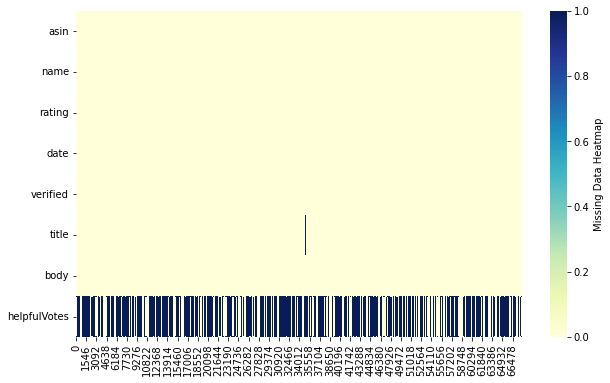

In [ ]:
# Checks
# Check data types
print(df.info())

# Check for missing values
print('\n\nMissing Values\n',df.isnull().sum(axis=0))

# Missing value heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data Heatmap'})
plt.show()



#**Duplicates**

It's important to check for duplicates: they may bias the learning process of many ML algorithms if instances are randomly selected and presented to an algorithm during training. Duplicates, in this process, amount to an instance getting more than one shot at influencing algorithm behavior.
Be careful when slicing data! One can go from having no duplicates to suddenly having thousands of duplicates after dropping features (deleting columns).

Guidelines:
* Generally, remove duplicates
* Duplicates may not impact model quality very much if there are only a small number
* Pandas: df = df.drop_duplicates()


In [ ]:

# Check for duplicates
print('\n Duplicates\n',df.duplicated().sum())


 Duplicates
 12


#**Text Preprocessing**

We will use some code to pre-process the text (title and text of reviews) and then perform EDA on the result

In [ ]:
# Figure length of review title and body
df['title_length'] = df['title'].str.len()
df['body_length'] = df['body'].str.len()

In [ ]:
## Change the review title and body type to string
df['title'] = df['title'].astype(str)
df['body'] = df['body'].astype(str)

## Lowercase all reviews
df['title'] = df['title'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['body'] = df['body'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.head


<bound method NDFrame.head of              asin               name  rating                 date  verified  \
0      B0000SX2UC              Janet       3  2005-10-11 00:00:00     False   
1      B0000SX2UC         Luke Wyatt       1  2004-01-07 00:00:00     False   
2      B0000SX2UC             Brooke       5  2003-12-30 00:00:00     False   
3      B0000SX2UC      amy m. teague       3  2004-03-18 00:00:00     False   
4      B0000SX2UC      tristazbimmer       4  2005-08-28 00:00:00     False   
...           ...                ...     ...                  ...       ...   
67981  B081H6STQQ              jande       5  2019-08-16 00:00:00     False   
67982  B081H6STQQ            2cool4u       5  2019-09-14 00:00:00     False   
67983  B081H6STQQ              simon       5  2019-07-14 00:00:00     False   
67984  B081TJFVCJ  Tobiasz Jedrysiak       5  2019-12-24 00:00:00      True   
67985  B0825BB7SG      Owen Gonzalez       5  2019-12-11 00:00:00     False   

                     

In [ ]:
## remove punctuation
df['title'] = df['title'].str.replace('.','')
df['body'] = df['body'].str.replace('.','')
df['title'] = df['title'].str.replace(',','')
df['body'] = df['body'].str.replace(',','')
df['title'] = df['title'].str.replace('!','')
df['body'] = df['body'].str.replace('!','')
df['title'] = df['title'].str.replace('?','')
df['body'] = df['body'].str.replace('?','')
print(df.head)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will cha

<bound method NDFrame.head of              asin               name  rating                 date  verified  \
0      B0000SX2UC              Janet       3  2005-10-11 00:00:00     False   
1      B0000SX2UC         Luke Wyatt       1  2004-01-07 00:00:00     False   
2      B0000SX2UC             Brooke       5  2003-12-30 00:00:00     False   
3      B0000SX2UC      amy m. teague       3  2004-03-18 00:00:00     False   
4      B0000SX2UC      tristazbimmer       4  2005-08-28 00:00:00     False   
...           ...                ...     ...                  ...       ...   
67981  B081H6STQQ              jande       5  2019-08-16 00:00:00     False   
67982  B081H6STQQ            2cool4u       5  2019-09-14 00:00:00     False   
67983  B081H6STQQ              simon       5  2019-07-14 00:00:00     False   
67984  B081TJFVCJ  Tobiasz Jedrysiak       5  2019-12-24 00:00:00      True   
67985  B0825BB7SG      Owen Gonzalez       5  2019-12-11 00:00:00     False   

                     

In [ ]:
# remove stopwords
import requests
stopwords_list = requests.get("https://gist.githubusercontent.com/rg089/35e00abf8941d72d419224cfd5b5925d/raw/12d899b70156fd0041fa9778d657330b024b959c/stopwords.txt").content
stop = set(stopwords_list.decode().splitlines()) 
#stop = stopwords.words('english')
df['title'] = df['title'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['body'] = df['body'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head

<bound method NDFrame.head of              asin               name  rating                 date  verified  \
0      B0000SX2UC              Janet       3  2005-10-11 00:00:00     False   
1      B0000SX2UC         Luke Wyatt       1  2004-01-07 00:00:00     False   
2      B0000SX2UC             Brooke       5  2003-12-30 00:00:00     False   
3      B0000SX2UC      amy m. teague       3  2004-03-18 00:00:00     False   
4      B0000SX2UC      tristazbimmer       4  2005-08-28 00:00:00     False   
...           ...                ...     ...                  ...       ...   
67981  B081H6STQQ              jande       5  2019-08-16 00:00:00     False   
67982  B081H6STQQ            2cool4u       5  2019-09-14 00:00:00     False   
67983  B081H6STQQ              simon       5  2019-07-14 00:00:00     False   
67984  B081TJFVCJ  Tobiasz Jedrysiak       5  2019-12-24 00:00:00      True   
67985  B0825BB7SG      Owen Gonzalez       5  2019-12-11 00:00:00     False   

                     

In [ ]:
# Stemming
st = PorterStemmer()
df['title'] = df['title'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df['body'] = df['body'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [ ]:
## Define a function which can be applied to calculate the score for the whole dataset
def senti(x):
    return TextBlob(x).sentiment.polarity  
def subj(x):
    return TextBlob(x).sentiment.subjectivity  
df['title_positivity'] = df['title'].apply(senti)
df['title_subjectivity'] = df['title'].apply(subj)
df['body_positivity'] = df['body'].apply(senti)
df['body_subjectivity'] = df['body'].apply(subj)

#**Descriptive Statistics**

Descriptive statistics entails the production and interpretation of both visualizations and numerical statistics.
* Numerical univariate statistics: mean, median, mode, trimmed mean, standard deviation, skewness, kurtosis, quartiles, IQR, range, etc.
* Numerical bivariate statistics: correlation, covariance, crosstabs, etc.
* Univariate graphs: box plots, violin plots, bar charts, histograms (i.e., prefer to avoid pie charts!)
* Bivariate & multivariate graphs: scatter plots, line charts, stacked/grouped histograms, stacked/grouped bar charts, side-by-side box plots, parallel coordinate plots, scatterplot matrices (“pairplots”), etc.  

In [ ]:
# Univariate descriptive statistics using pandas

# Ensure the maximum number of columns are displayed in pandas
pd.set_option('display.max_columns', None)

# Univariate numerical statistics using pandas .describe 
print("UNIVARIATE DESCRIPTIVE STAT using pandas\n",df.describe(exclude=['object']).T)
print("\n SKEWNESS\n",df.skew())
print("\n FISHER'S KURTOSIS\n",df.kurt())

UNIVARIATE DESCRIPTIVE STAT using pandas
                       count unique   top   freq        mean         std  min  \
rating              67986.0    NaN   NaN    NaN    3.807916    1.582906  1.0   
verified              67986      2  True  61225         NaN         NaN  NaN   
helpfulVotes        27215.0    NaN   NaN    NaN     8.22969   31.954877  1.0   
title_length        67972.0    NaN   NaN    NaN   24.484773   19.145103  1.0   
body_length         67965.0    NaN   NaN    NaN  295.550342  647.515406  1.0   
title_positivity    67986.0    NaN   NaN    NaN    0.185219    0.355927 -1.0   
title_subjectivity  67986.0    NaN   NaN    NaN    0.254592    0.344729  0.0   
body_positivity     67986.0    NaN   NaN    NaN    0.249077    0.340214 -1.0   
body_subjectivity   67986.0    NaN   NaN    NaN    0.428083    0.312993  0.0   

                     25%       50%    75%      max  
rating               3.0       5.0    5.0      5.0  
verified             NaN       NaN    NaN      NaN 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == '__main__':


CORRELATION MATRIX
                       rating  verified  helpfulVotes  title_length  \
rating              1.000000  0.105801     -0.038135     -0.168339   
verified            0.105801  1.000000     -0.027038     -0.124578   
helpfulVotes       -0.038135 -0.027038      1.000000      0.051352   
title_length       -0.168339 -0.124578      0.051352      1.000000   
body_length        -0.058393 -0.292964      0.188436      0.268400   
title_positivity    0.328437  0.045502     -0.009937      0.018473   
title_subjectivity  0.171299 -0.012937     -0.017894      0.120466   
body_positivity     0.403681  0.072563     -0.041138     -0.086235   
body_subjectivity   0.177468 -0.046632      0.005115      0.067039   

                    body_length  title_positivity  title_subjectivity  \
rating                -0.058393          0.328437            0.171299   
verified              -0.292964          0.045502           -0.012937   
helpfulVotes           0.188436         -0.009937           

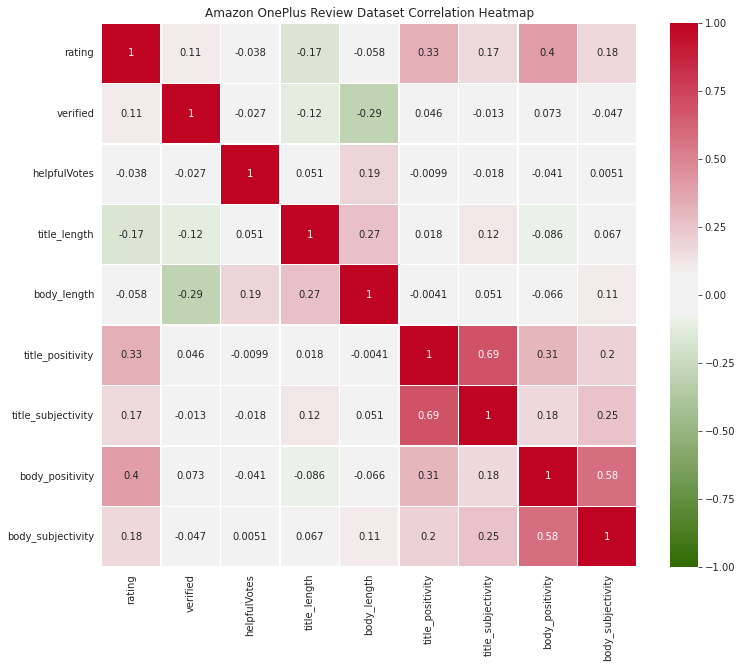



COVARIANCE MATRIX
                        rating   verified  helpfulVotes  title_length  \
rating               2.505591   0.050119     -2.074381     -5.101735   
verified             0.050119   0.089559     -0.307602     -0.713826   
helpfulVotes        -2.074381  -0.307602   1021.114177     34.169603   
title_length        -5.101735  -0.713826     34.169603    366.534952   
body_length        -59.848824 -56.766535   5547.121523   3327.683351   
title_positivity     0.185041   0.004847     -0.113295      0.125886   
title_subjectivity   0.093473  -0.001335     -0.197861      0.795099   
body_positivity      0.217393   0.007388     -0.419345     -0.561695   
body_subjectivity    0.087924  -0.004368      0.047150      0.401703   

                      body_length  title_positivity  title_subjectivity  \
rating                 -59.848824          0.185041            0.093473   
verified               -56.766535          0.004847           -0.001335   
helpfulVotes          5547.121523

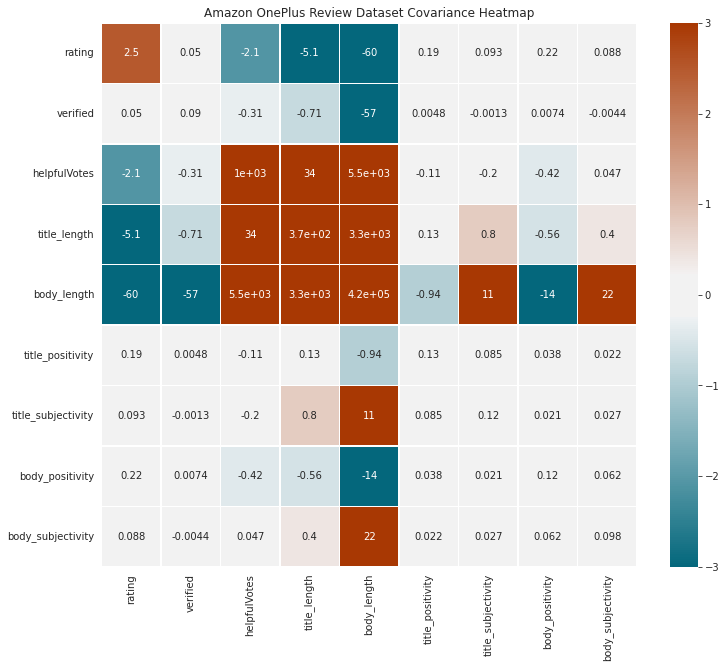

In [ ]:
# Multivariate numerical descriptive statistics

#Correlation Matrix
print("CORRELATION MATRIX\n",df.corr(method='pearson', min_periods=1))
print("\n\n")

#Correlation Matrix as a Heatmap
sns.set_style('darkgrid')
plt.figure(figsize = (12,10))
cmap = sns.diverging_palette(120, 10, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True) 
sns.heatmap((df).corr(), vmin = -1, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Amazon OnePlus Review Dataset Correlation Heatmap")
plt.show()

# Covariance Matrix
print("\n\nCOVARIANCE MATRIX\n",df.cov())
print("\n\n")

#Covariance Matrix as a Heatmap
sns.set_style('darkgrid')
plt.figure(figsize = (12,10))
cmap = sns.diverging_palette(220, 20, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True) 
sns.heatmap((df).cov(), vmin = -3, vmax = 3, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Amazon OnePlus Review Dataset Covariance Heatmap")
plt.show()

In [ ]:
# Crosstab
print('rating vs  verified\n',pd.crosstab(df['rating'], df['verified']))



rating vs  verified
 verified  False   True
rating                
1          1833  10910
2           667   3248
3           624   4128
4           886   7938
5          2751  35001


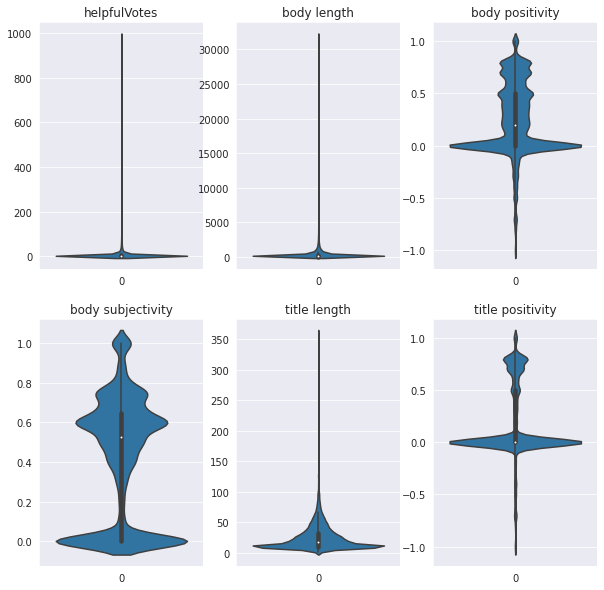

In [ ]:
# Univariate graphical descriptive statistics -violin plots 

# Violin plots
np.seterr(under='ignore')
plt.figure(figsize = (10,10))
plt.subplot(2,3,1)
sns.violinplot(data=df['helpfulVotes']).set(title='helpfulVotes')
plt.subplot(2,3,2)
sns.violinplot(data=df['body_length']).set(title='body length')
plt.subplot(2,3,3)
sns.violinplot(data=df['body_positivity']).set(title='body positivity')
plt.subplot(2,3,4)
sns.violinplot(data=df['body_subjectivity']).set(title='body subjectivity')
plt.subplot(2,3,5)
sns.violinplot(data=df['title_length']).set(title='title length')
plt.subplot(2,3,6)
sns.violinplot(data=df['title_positivity']).set(title='title positivity')
plt.show()


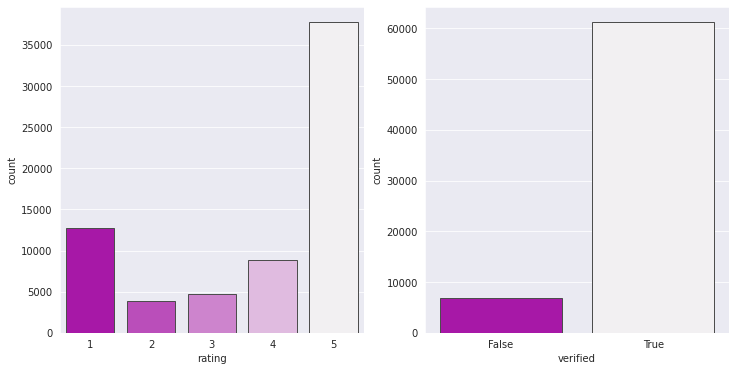

In [ ]:
# Univariate Bar Charts

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.countplot(  x="rating", data=df,palette="light:m_r",
    edgecolor=".3")
plt.subplot(1,2,2)
sns.countplot(  x="verified", data=df,palette="light:m_r",
    edgecolor=".3")
plt.show()

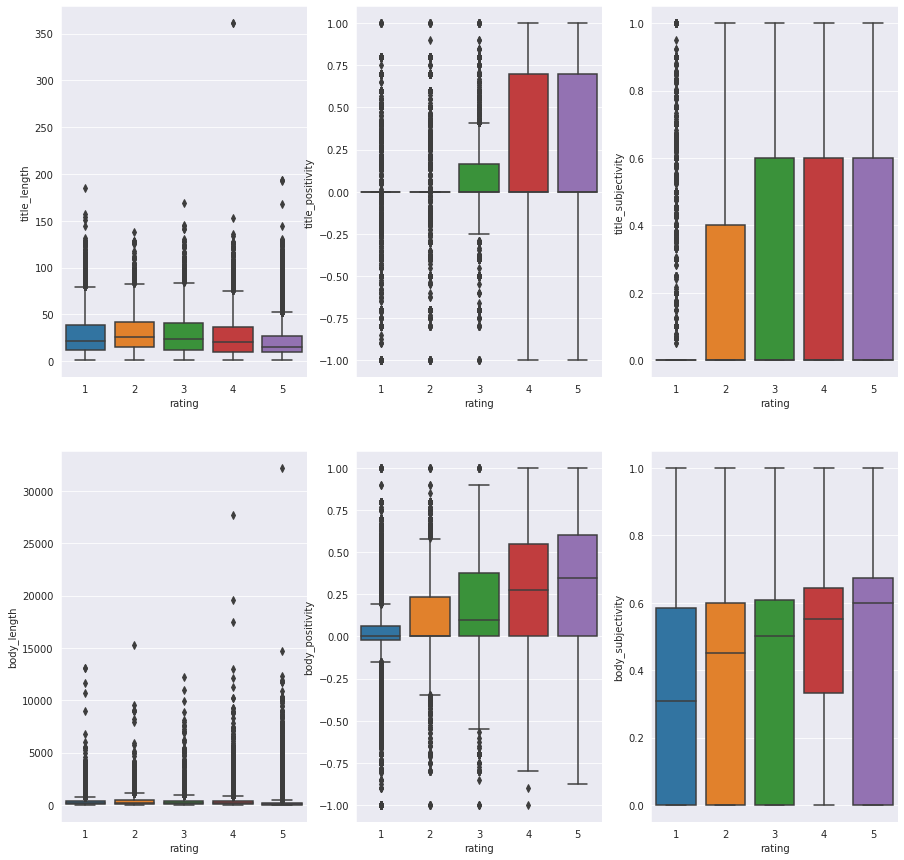

In [ ]:
# Bivariate Graphical Descriptive Statistics
# Side-by-side Boxplots

fig, axes = plt.subplots(2, 3, figsize=(15,15))
sns.boxplot(  y="title_length", x= "rating", data=df,  orient='v' , ax=axes[0, 0])
sns.boxplot(  y="title_positivity", x= "rating", data=df,  orient='v' , ax=axes[0, 1])
sns.boxplot(  y="title_subjectivity", x= "rating", data=df,  orient='v' , ax=axes[0, 2])
sns.boxplot(  y="body_length", x= "rating", data=df,  orient='v' , ax=axes[1, 0])
sns.boxplot(  y="body_positivity", x= "rating", data=df,  orient='v' , ax=axes[1, 1])
sns.boxplot(  y="body_subjectivity", x= "rating", data=df,  orient='v' , ax=axes[1, 2])
plt.show()

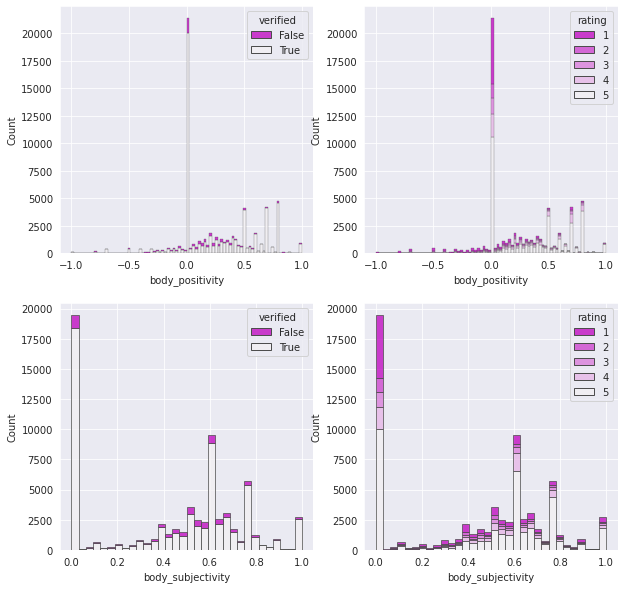

In [ ]:
# Stacked Histograms

fig, axes = plt.subplots(2, 2, figsize=(10,10))
sns.histplot(  x="body_positivity", hue="verified", multiple="stack", data=df, ax=axes[0, 0],palette="light:m_r",
    edgecolor=".3")
sns.histplot(  x="body_positivity", hue="rating", multiple="stack", data=df, ax=axes[0, 1],palette="light:m_r",
    edgecolor=".3")
sns.histplot(  x="body_subjectivity", hue="verified", multiple="stack", data=df, ax=axes[1, 0],palette="light:m_r",
    edgecolor=".3")
sns.histplot(  x="body_subjectivity", hue="rating", multiple="stack", data=df, ax=axes[1, 1],palette="light:m_r",
    edgecolor=".3")
plt.show()

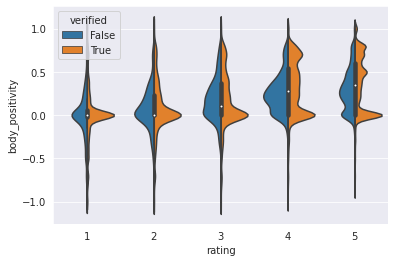

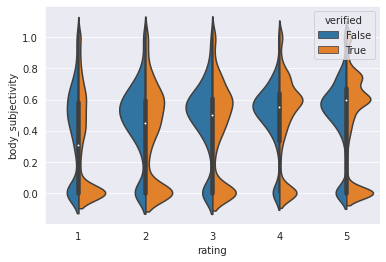

In [ ]:
# Bivariate violinplots
sns.violinplot(x ="rating", y ="body_positivity", hue ="verified",data = df, split = True)
plt.show()
sns.violinplot(x ="rating", y ="body_subjectivity", hue ="verified",data = df, split = True)
plt.show()


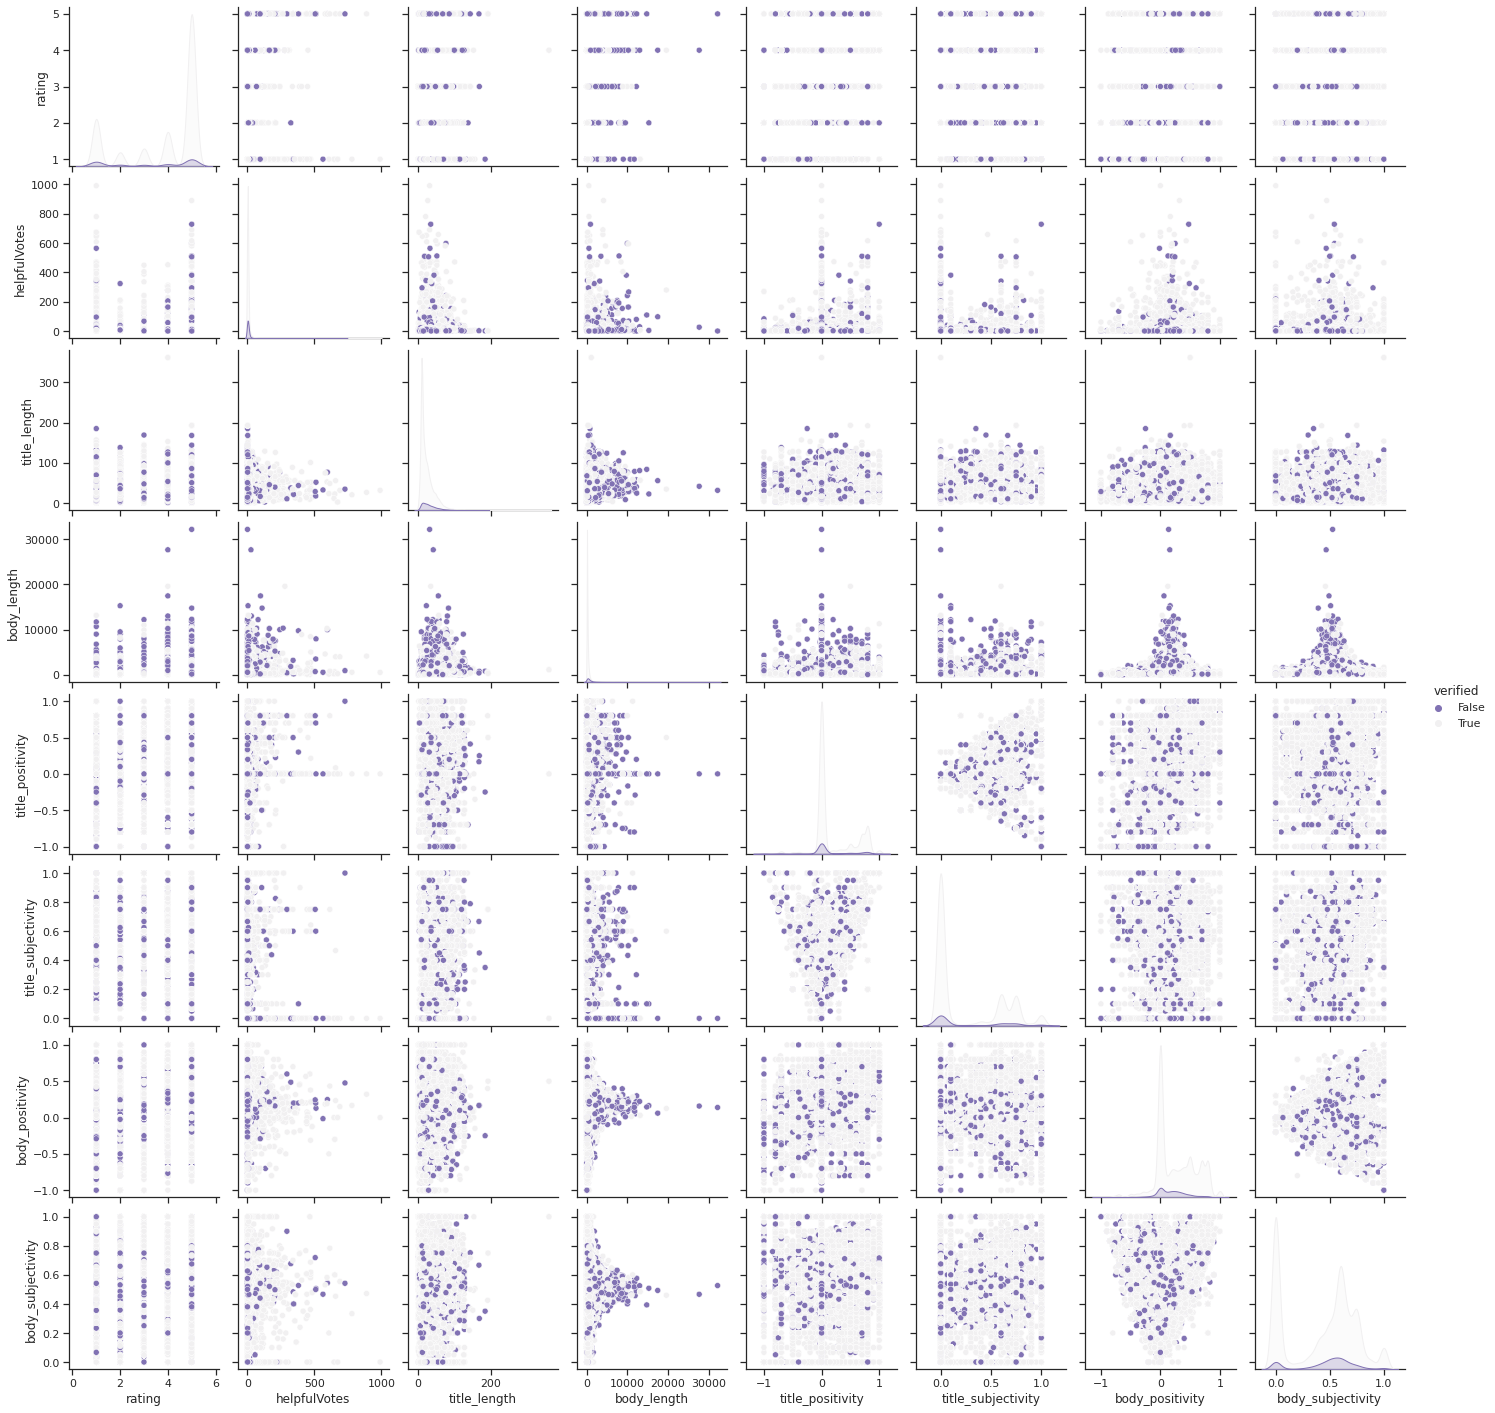

In [ ]:
# Scatterplot matrix (aka pairplot) - these can take some time to gerenerate if the number of features is large

sns.set_theme(style="ticks")
sns.color_palette("hls", 8)
sns.pairplot(df, hue="verified",palette="light:m_r")

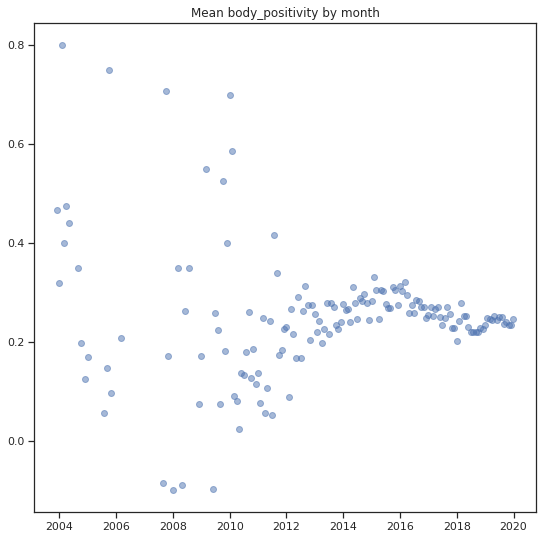

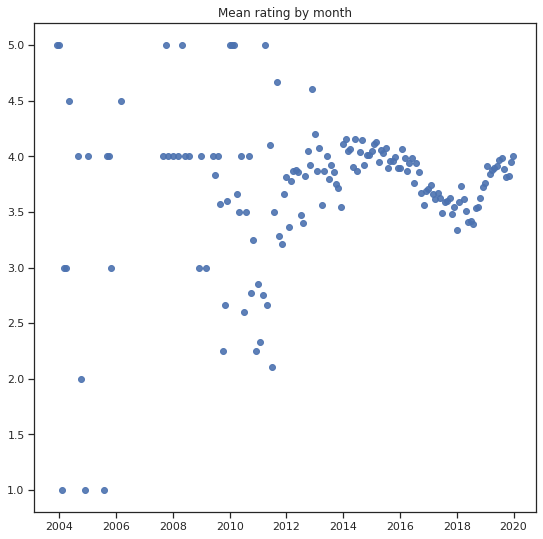

In [ ]:
# Line charts
plt.figure(figsize = (9,9))
df_resampled = df.resample('M', on='date').mean().dropna(how='all')
df_resampled['date'] = df_resampled.index.values
plt.scatter(df_resampled['date'],df_resampled['body_positivity'],alpha=0.5)
plt.title('Mean body_positivity by month')
plt.show()

plt.figure(figsize = (9,9))
df_resampled = df.resample('M', on='date').mean().dropna(how='all')
df_resampled['date'] = df_resampled.index.values
plt.scatter(df_resampled['date'],df_resampled['rating'],alpha=0.9)
plt.title('Mean rating by month')
plt.show()

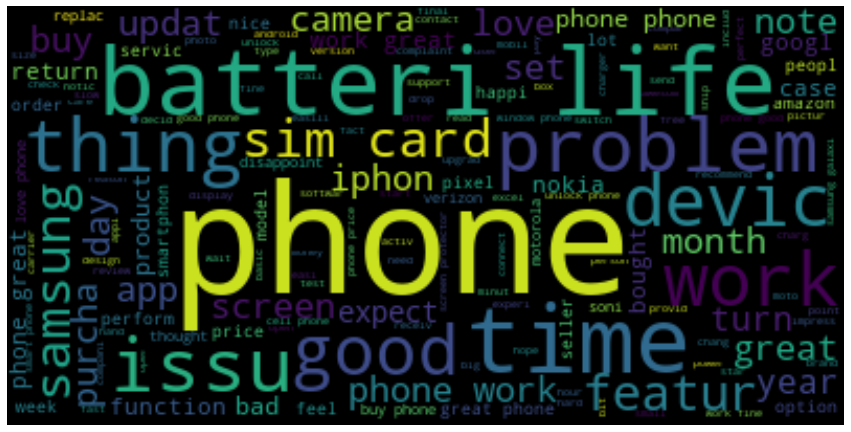

In [ ]:
# WordCloud
txt = ""
for i in range(len(df['body'])):
  txt = txt + df.at[i,'body']

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(txt)

# Display the generated image:
plt.figure(figsize = (15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#**Interactive Visualizations**

In [ ]:
# Plotly
df_resampled = df.resample('M', on='date').mean().dropna(how='all')
df_resampled['date'] = df_resampled.index.values
fig = px.scatter_3d(df_resampled, z='rating', y='body_positivity', x='date', color="verified")
# build jupyter dash app 
app = JupyterDash(__name__)
# add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
# run app inline
app.run_server(mode='inline') 

<IPython.core.display.Javascript object>

#**Automated Visualizations**

                                             |          | [  0%]   00:00 -> (? left)


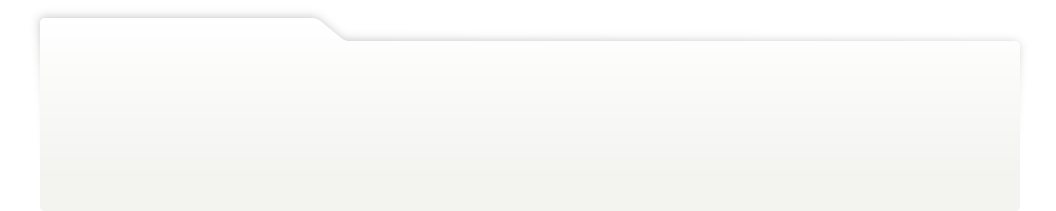
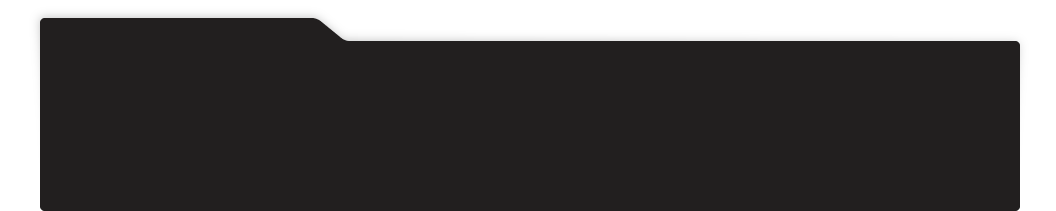
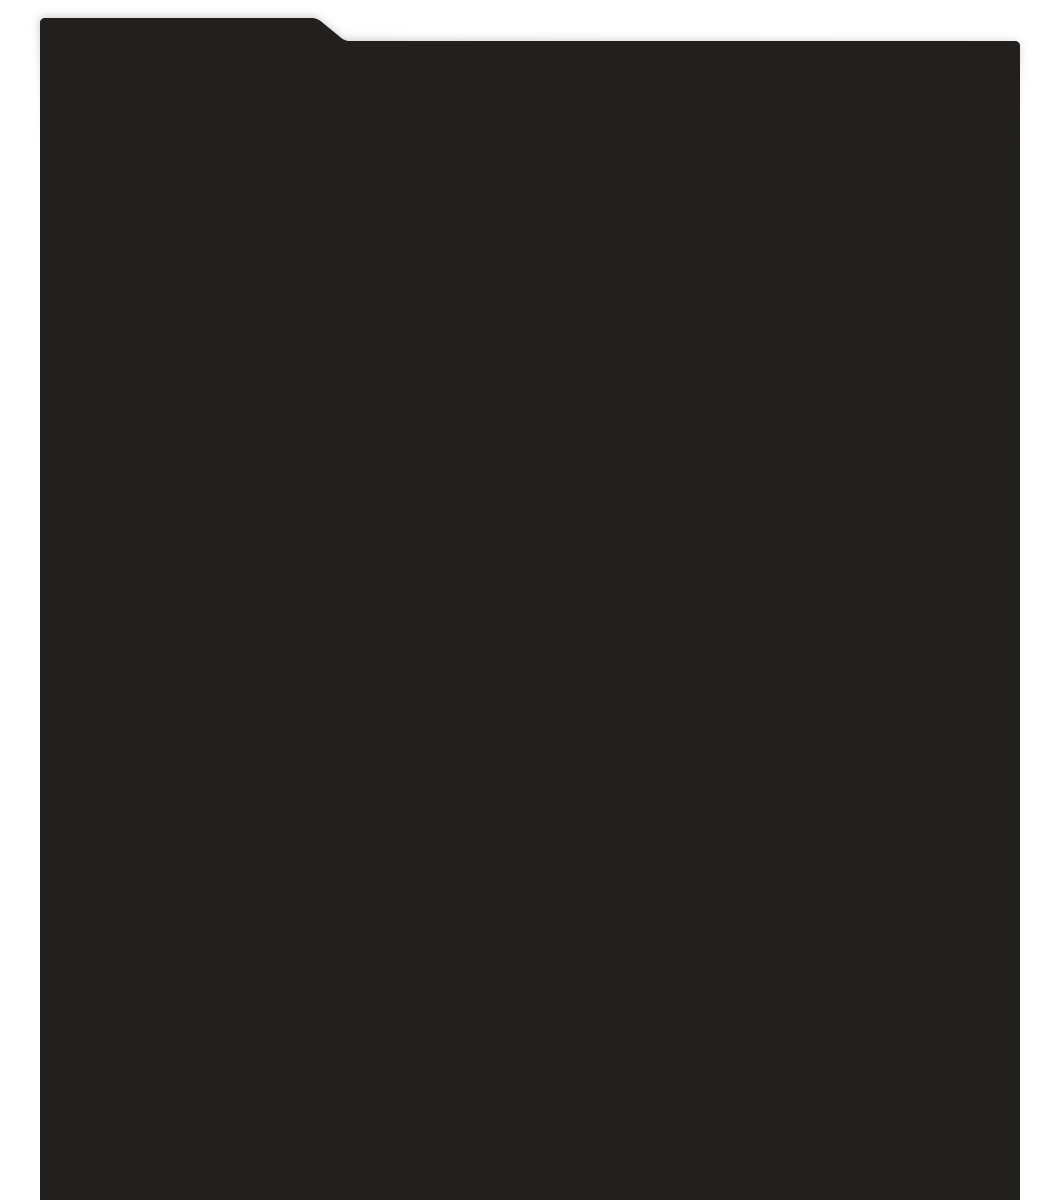
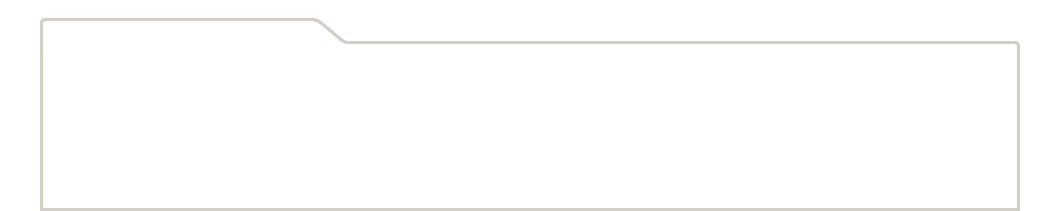
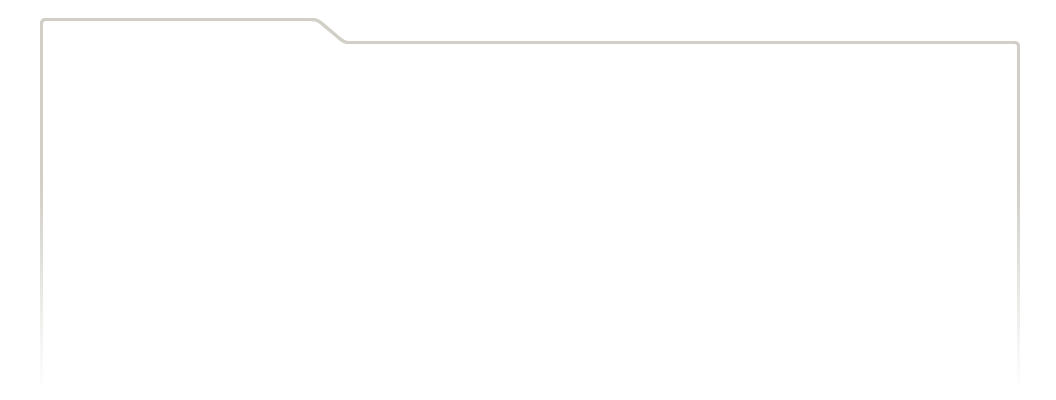
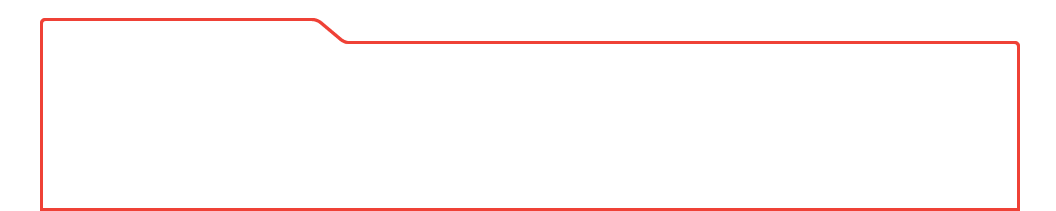
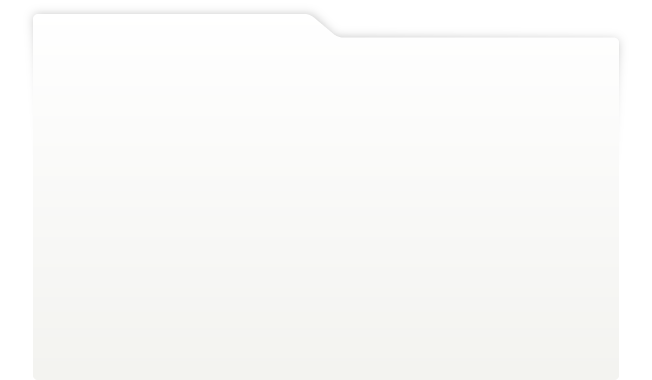
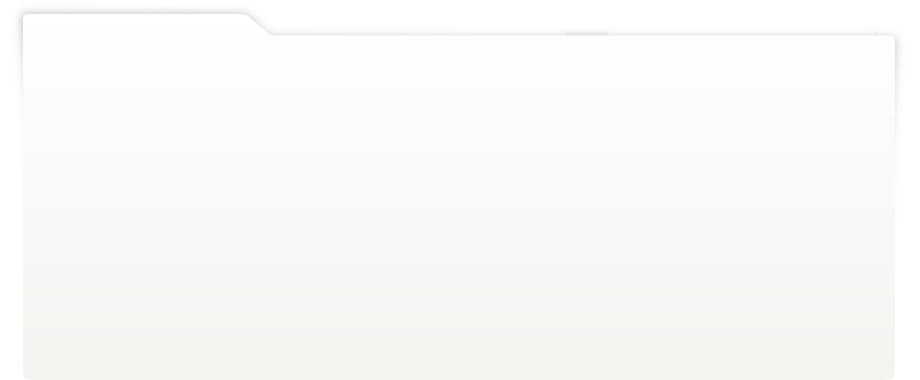
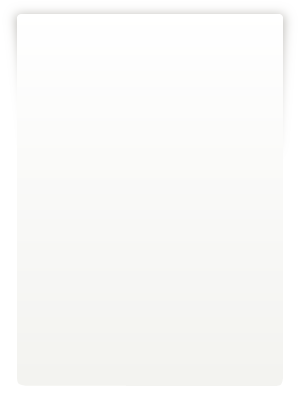
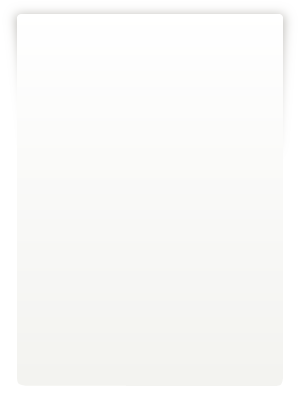
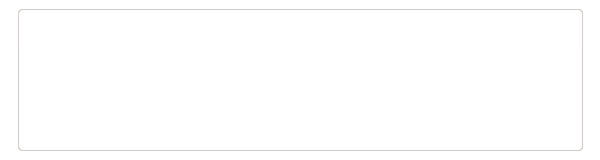
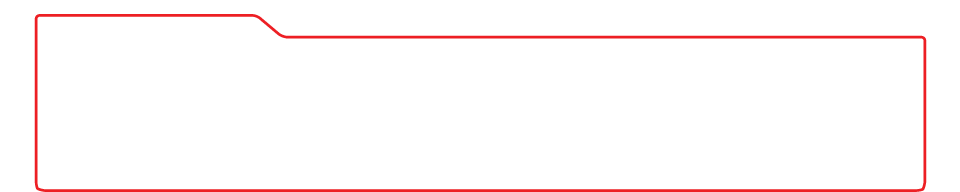
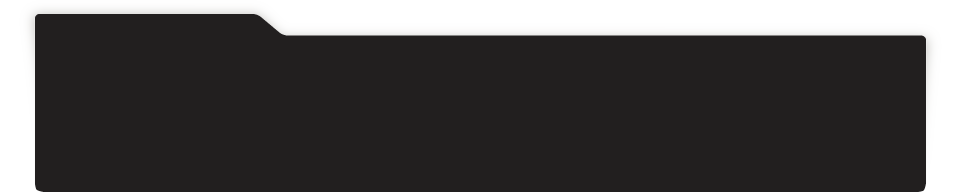
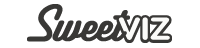
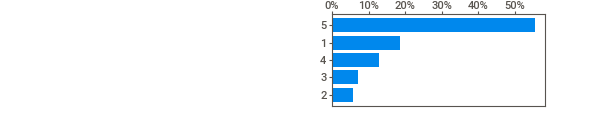
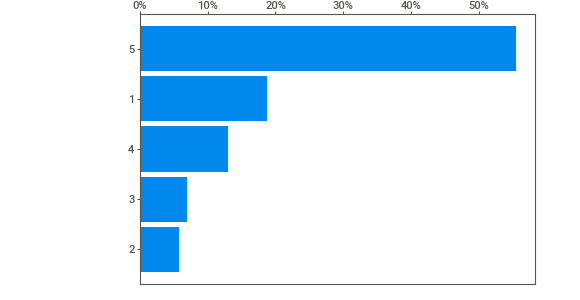
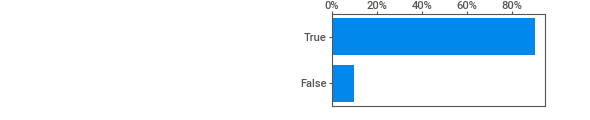
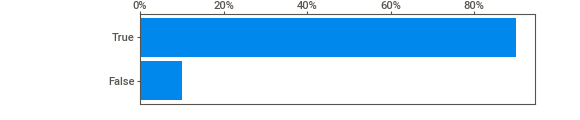
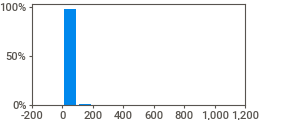
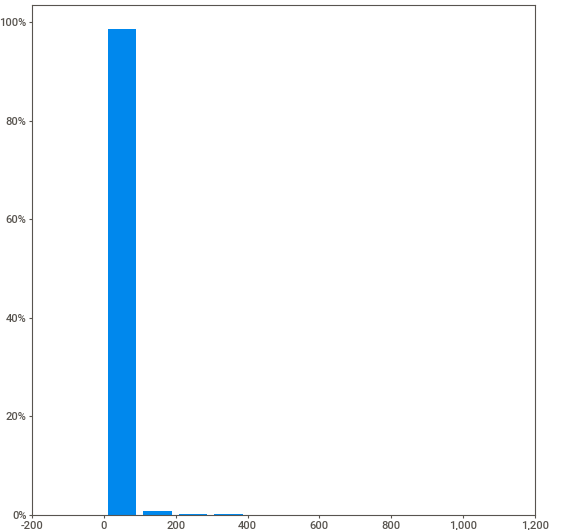
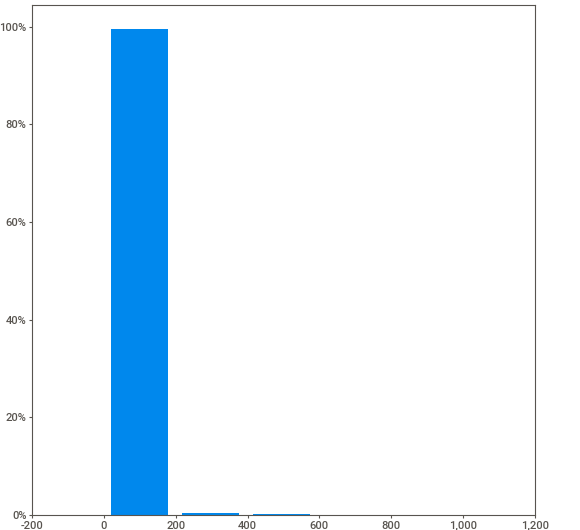
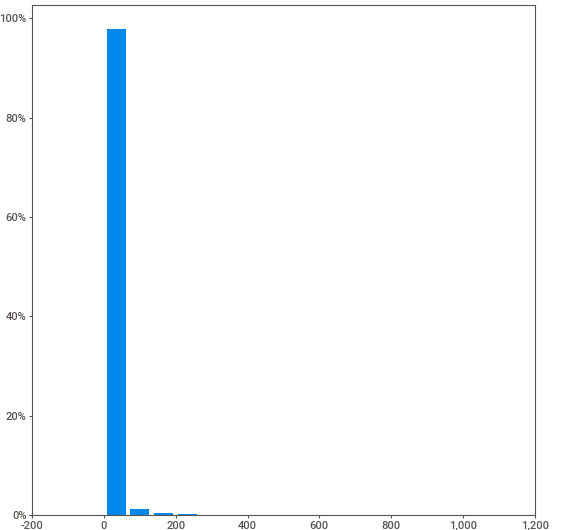
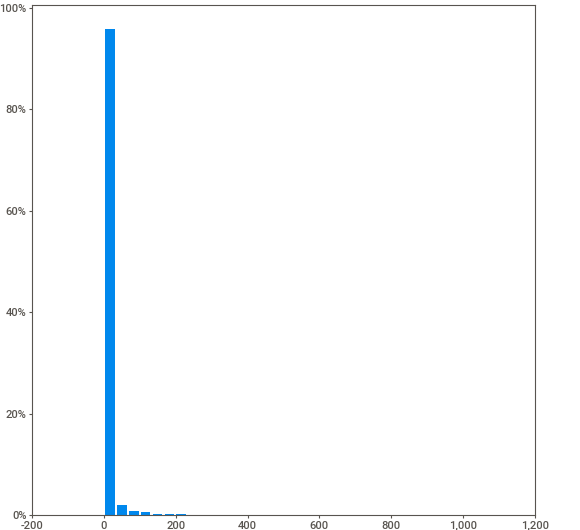
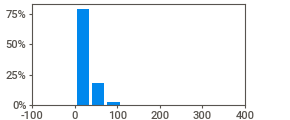
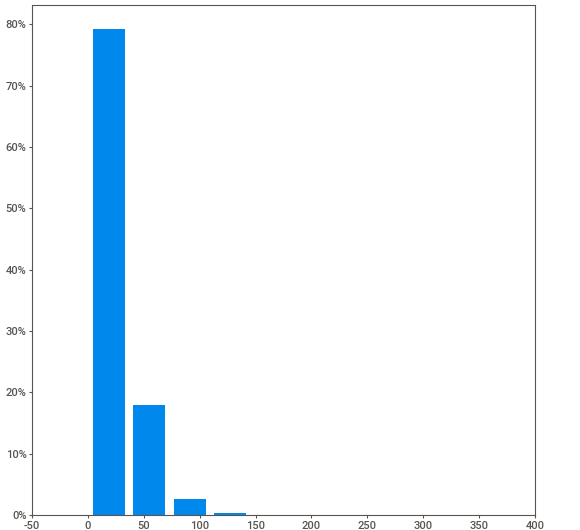
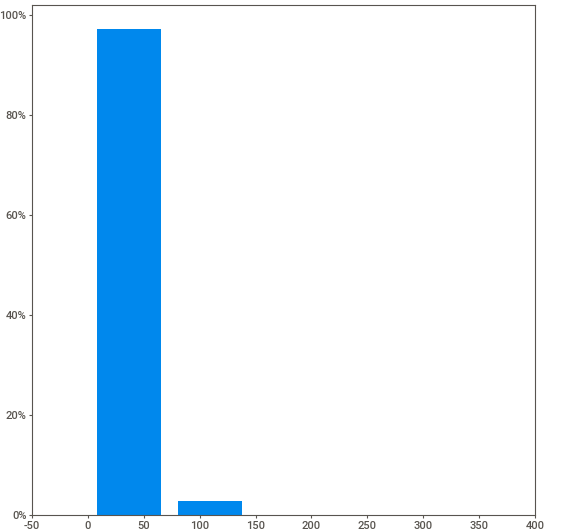
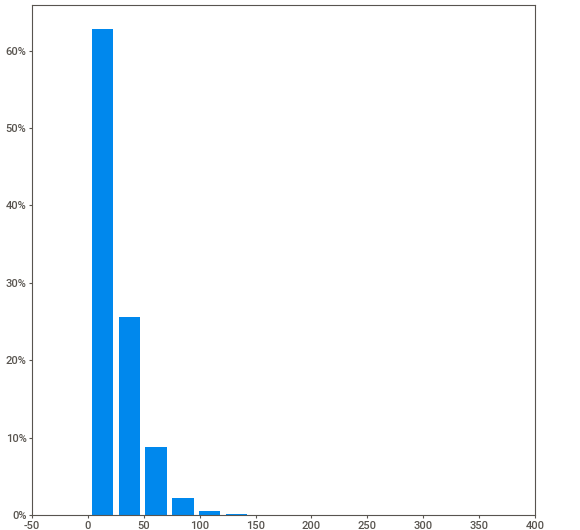
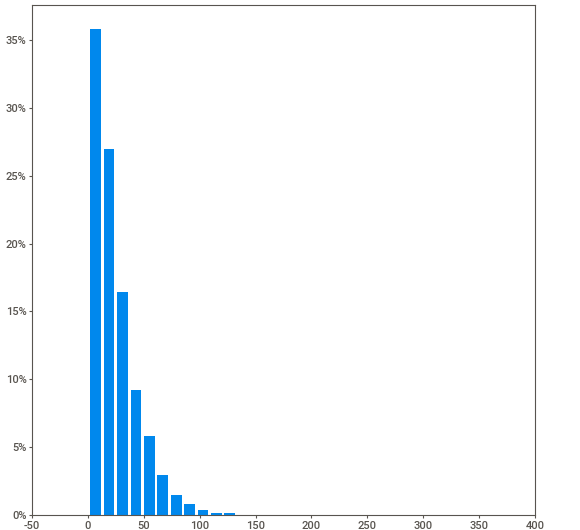
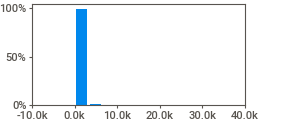
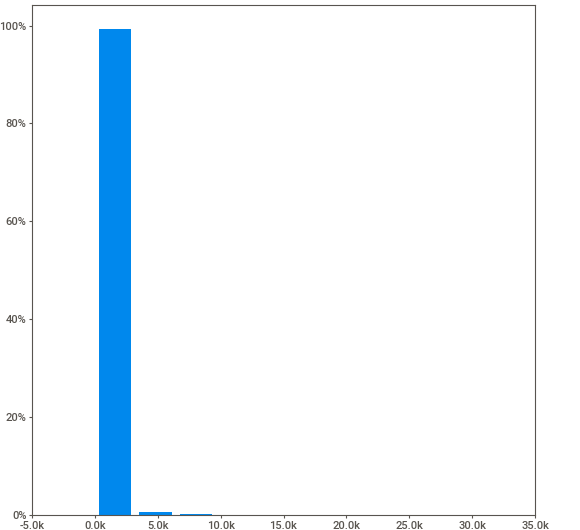
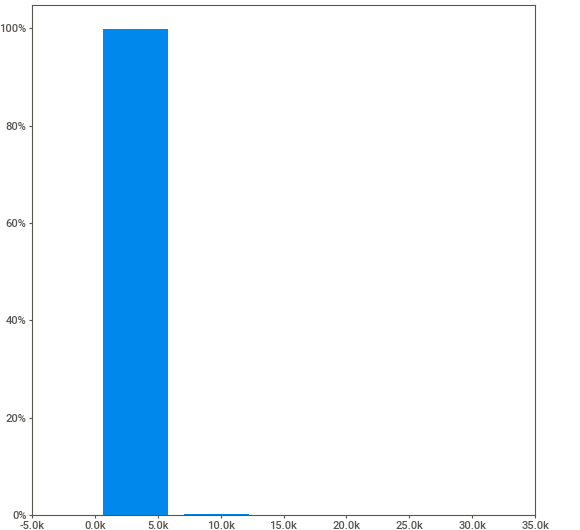
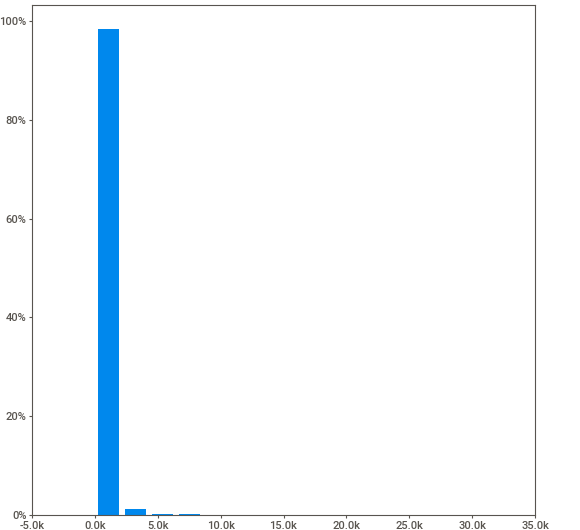
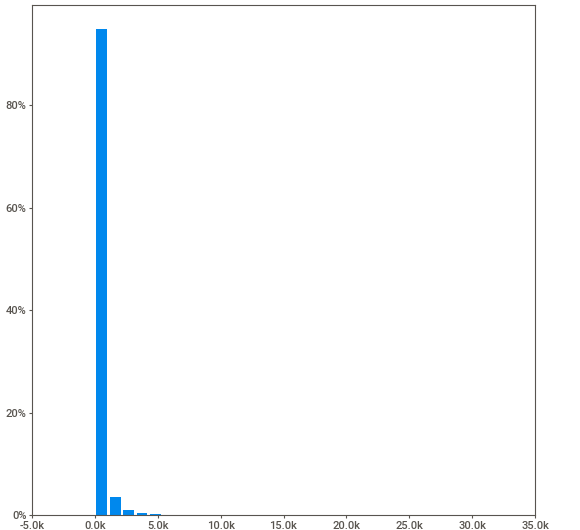
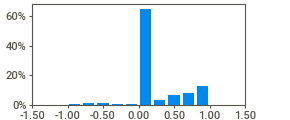
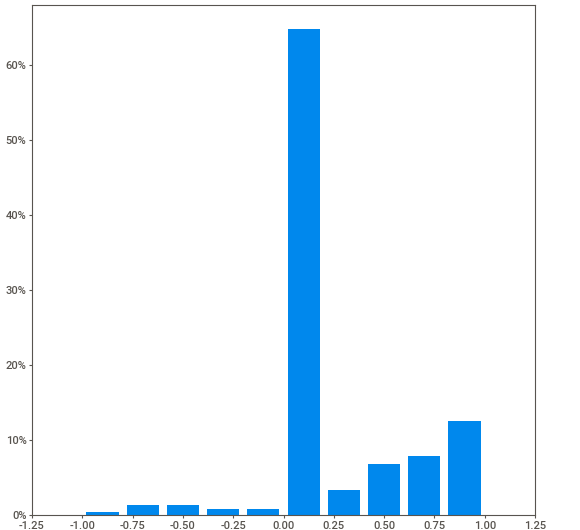
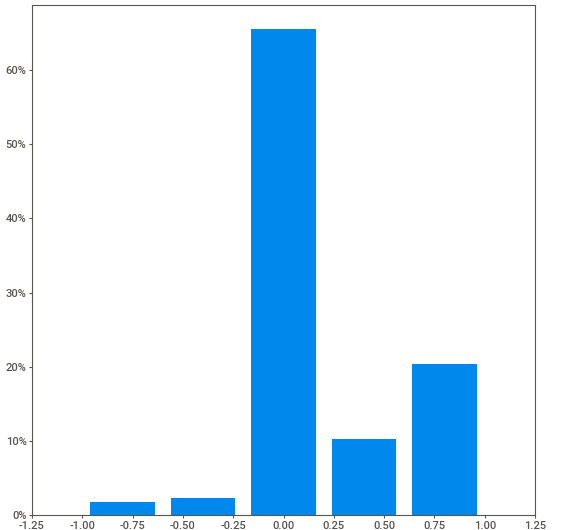
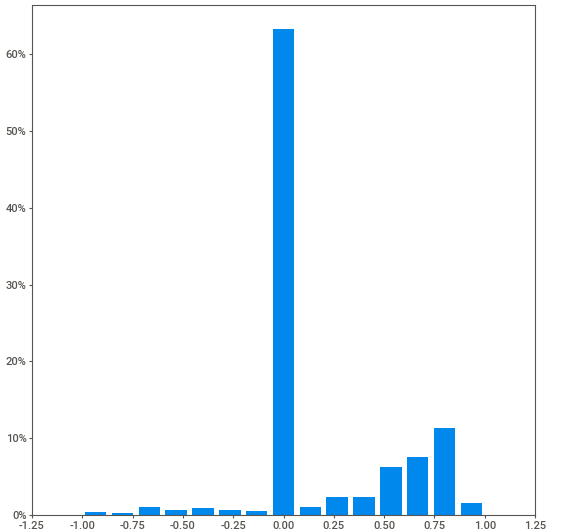
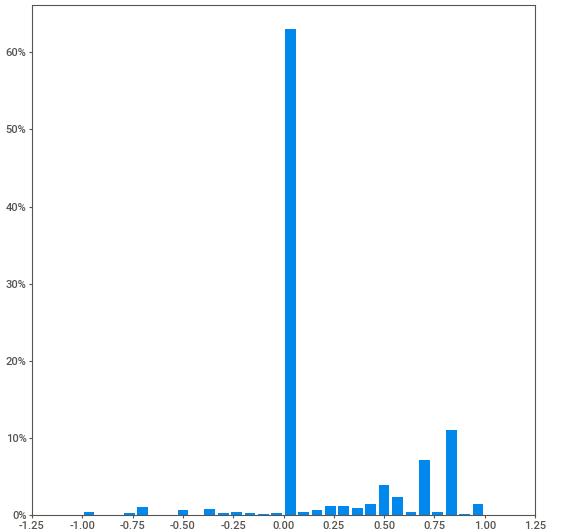
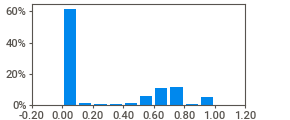
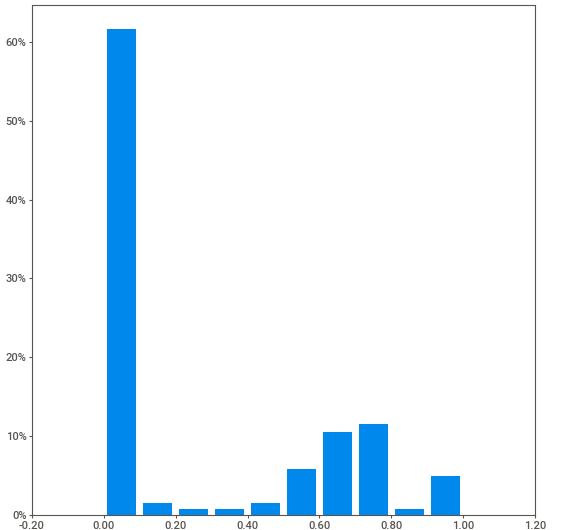
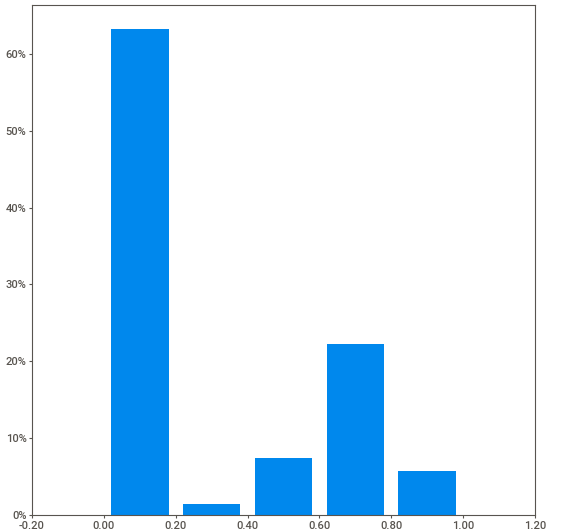
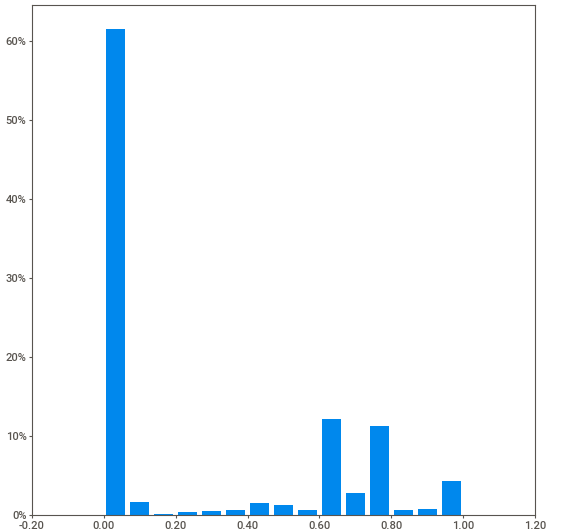
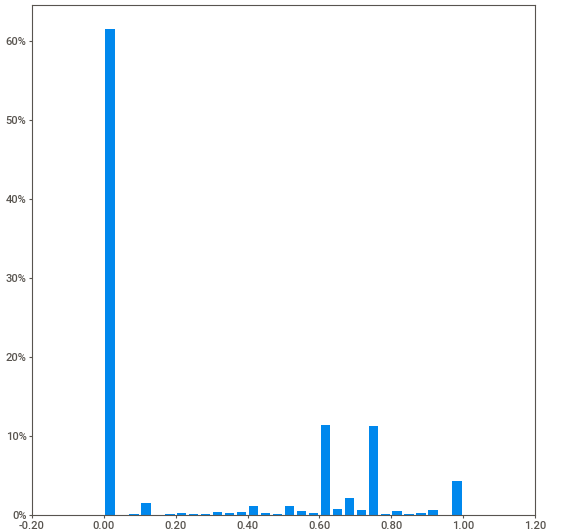
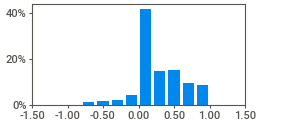
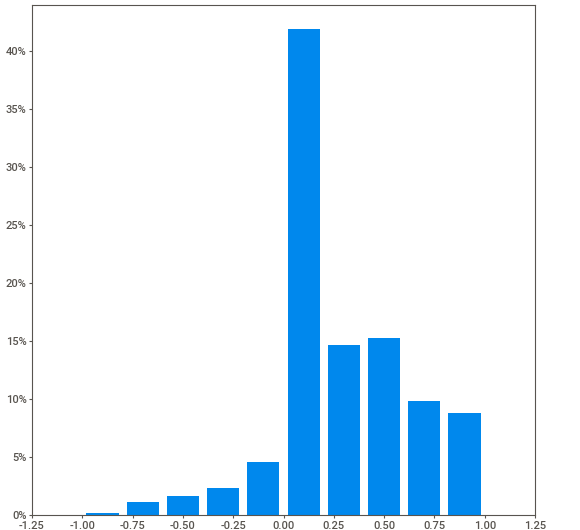
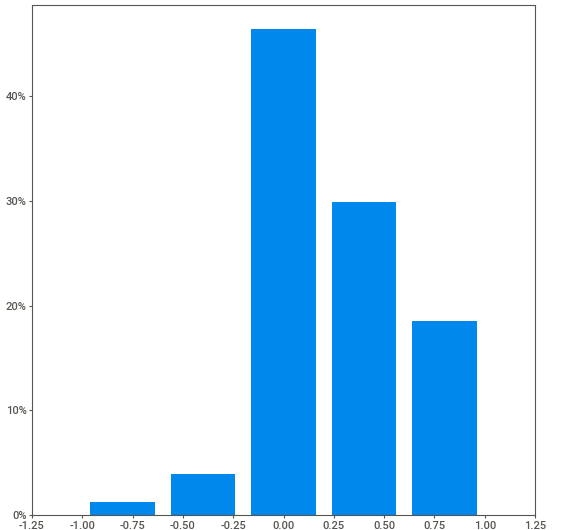
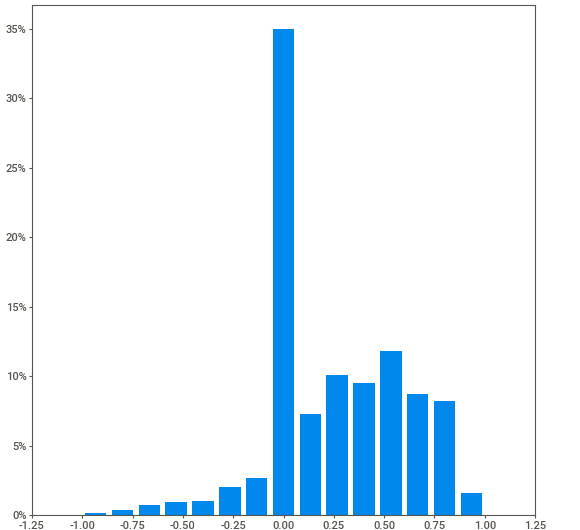
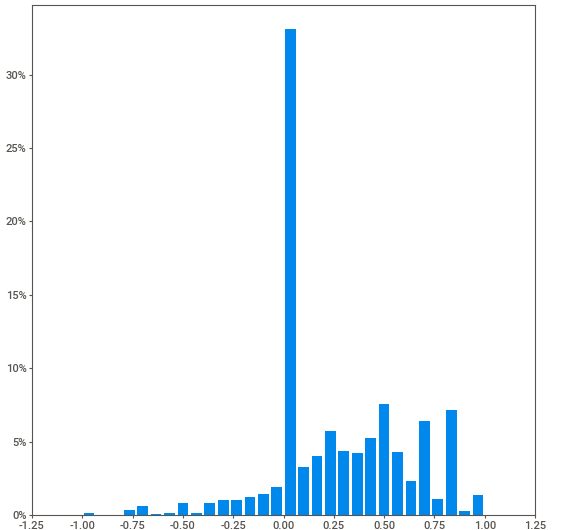
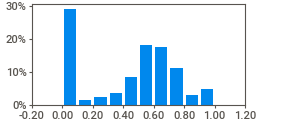
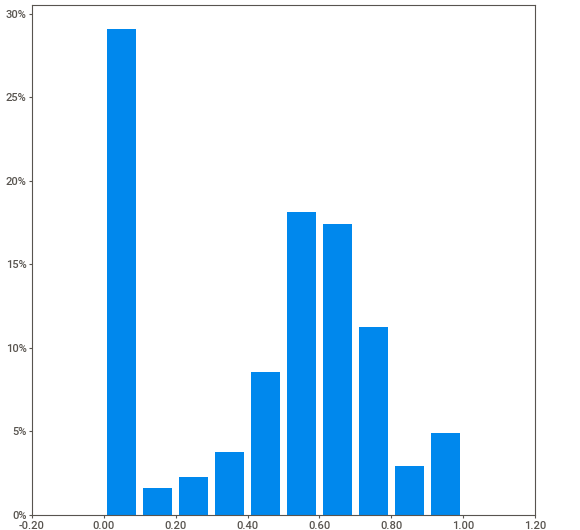
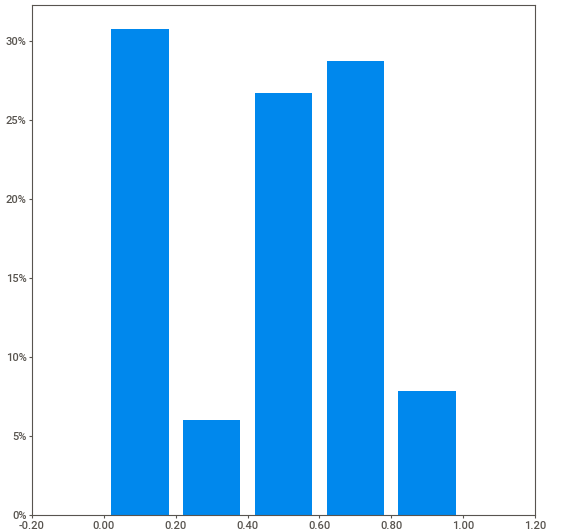
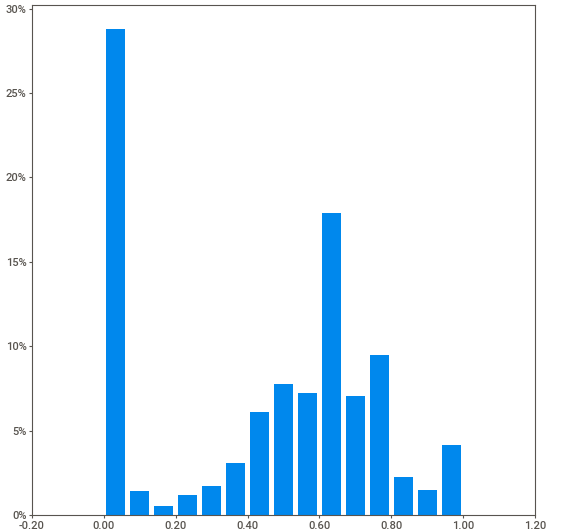
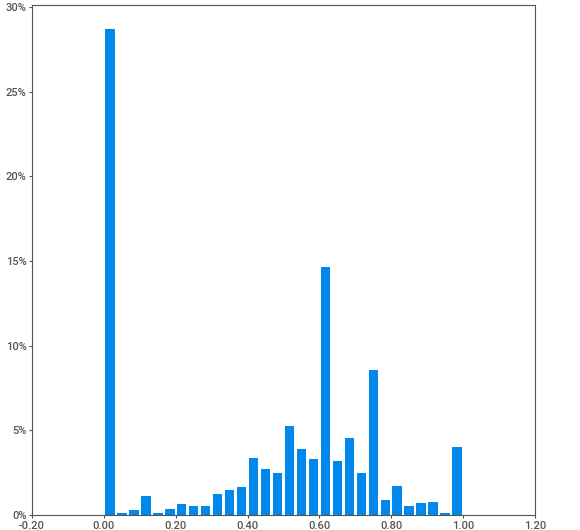
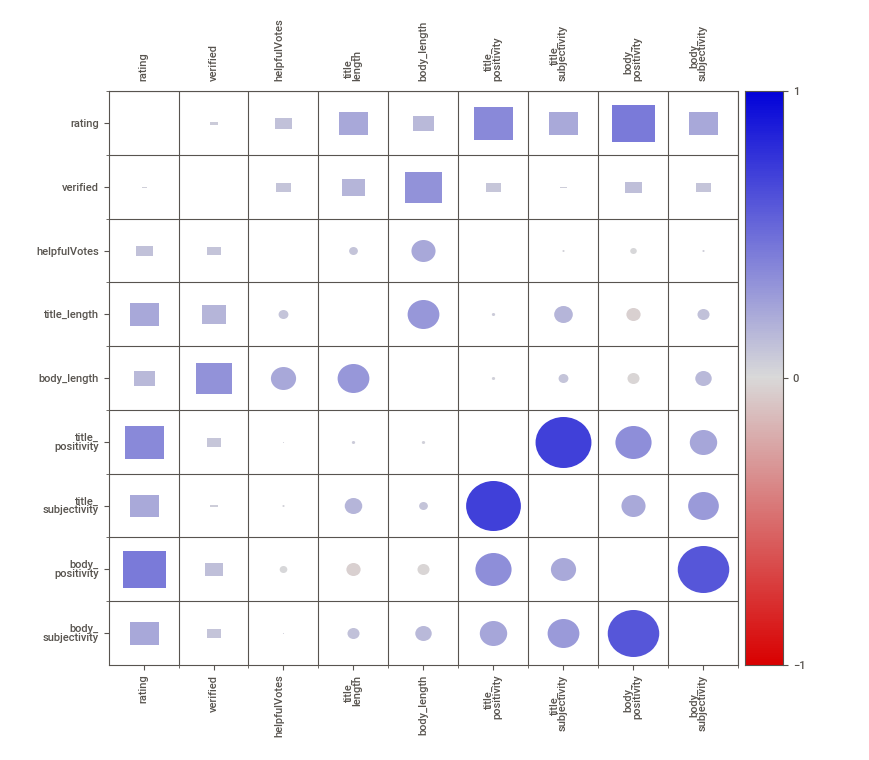
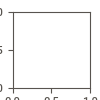

In [ ]:
# Sweetviz as an example of automated visualization

vizreport = sv.analyze(df)           
vizreport.show_notebook(layout='widescreen', w=1500, h=300, scale=0.7) #widescreen layout
#vizreport.show_notebook(layout='vertical', w=800, h=300, scale=0.7)   #vertical layout

In [ ]:
# AutoViz
# sep = ","
# dataf = AV.AutoViz(file_, depVar = 'Converted', sep=",", dfte=None, header=0, verbose=0, lowess=False, chart_format="html", max_rows_analyzed=2000, max_cols_analyzed=20,)

#**Conclusions**

The product is generally doing well, based upon the following observations:
1. The monthly mean rating has converged to about 4 (out of 5).
2. The monthly mean sentiment positivity of the review comments has converged to roughly 0.25  
3. Most ratings are a 5. 

Caveats: 
1. Some reviewers may be compensated for their reviews. 
2. While most reviewers are verified, the helpfulVotes data is missing for approximately 60% of the instances, and this limits the assessment of quality of the reviews (to the extent helpfulvotes are a meaningful assessment of review quality).

A long list of detailed observations from the descriptive statistics can be compiled that could include: 
1. Most review titles and text comments are short. Some have time to write comments in the tens of thousands of characters! 
2. The titles and comments are overwhelmingly positive.
3. Subjectivity generally increases with rating.
4. Positivity of the comments increases with rating, as one might expect.
5. Most of the recent reviews are by verified buyers. 

Data Pre-processing Takeaways
1. asin and name can presumably be deleted.
2. Deletion of reviews with a missing review title or body will not materially change the analysis
3. May need to consider the effect of different stemmers and sentiment analysis tools.